In [1]:
import numpy as np
import numpy
from scipy import sparse
import functools, operator, collections, itertools
import pandas as pd

In [2]:
url = 'https://github.com/dhimmel/learn/raw/{}/all-features/data/matrix/dwpc.tsv.bz2'.format(
'ef5f7a6b76b6a01499d65b95e3d7ca93ac5aba57')

rep_results = pd.DataFrame.from_csv(url, sep='\t')
rep_results = rep_results.reset_index()

rep_results = rep_results[rep_results['hetnet'] == 'rephetio-v2.0']
del rep_results['hetnet']
rep_results.head(2)

,compound_id,disease_id,CbG<rG<rGaD,CbG<rG<rGdD,CbG<rG<rGuD,CbG<rGaD,CbG<rGaDrD,CbG<rGbCpD,CbG<rGbCtD,CbG<rGcGaD,...,CuGuDpCpD,CuGuDpCtD,CuGuDpSpD,CuGuDrD,CuGuDrDrD,CuGuDtCpD,CuGuDtCtD,CuGuDuGaD,CuGuDuGdD,CuGuDuGuD
0,DB00014,DOID:10283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000736,0.0,0.00000,0.002449,0.000273,0.001891,0.0,0.000196
1,DB00014,DOID:10534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.001628,0.0,0.00123,0.000000,0.000000,0.001286,0.0,0.000000


In [3]:
cypher_df = rep_results.melt(id_vars=['compound_id', 'disease_id'], var_name='metapath', value_name='cypher_dwpc')
cypher_df.head(2)

,compound_id,disease_id,metapath,cypher_dwpc
0,DB00014,DOID:10283,CbG<rG<rGaD,0.0
1,DB00014,DOID:10534,CbG<rG<rGaD,0.0


In [4]:
dwpc_results = pd.read_table('data/dwpc_data.tsv')
dwpc_results = dwpc_results.rename(columns={'compound': 'compound_id', 'disease': 'disease_id'})
dwpc_results.head(2)

,compound_id,disease_id,CuGuDuGuD,CuGuDuGdD,CuGuDuGaD,CuGuDtCtD,CuGuDtCpD,CuGuDrDrD,CuGuDrD,CuGuDpSpD,...,CbG<rGcGuD,CbG<rGcGdD,CbG<rGcGaD,CbG<rGbCtD,CbG<rGbCpD,CbG<rGaDrD,CbG<rGaD,CbG<rG<rGuD,CbG<rG<rGdD,CbG<rG<rGaD
0,DB00014,DOID:0050156,0.001791,0.000662,0.000216,0.0,0.002885,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DB00014,DOID:0050425,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
matrix_df = dwpc_results.melt(id_vars=['compound_id', 'disease_id'], var_name='metapath', value_name='matrix_dwpc')
matrix_df.head(2)

,compound_id,disease_id,metapath,matrix_dwpc
0,DB00014,DOID:0050156,CuGuDuGuD,0.001791
1,DB00014,DOID:0050425,CuGuDuGuD,0.000000


In [6]:
compare_df = cypher_df.merge(matrix_df)
compare_df['difference'] = compare_df.cypher_dwpc - compare_df.matrix_dwpc
compare_df.head(2)

,compound_id,disease_id,metapath,cypher_dwpc,matrix_dwpc,difference
0,DB00014,DOID:10283,CbG<rG<rGaD,0.0,0.0,0.0
1,DB00014,DOID:10534,CbG<rG<rGaD,0.0,0.0,0.0


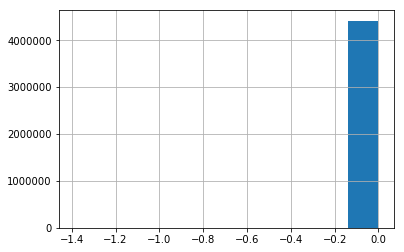

In [7]:
%matplotlib inline
compare_df.difference.hist();

In [8]:
compare_df.sort_values('difference', ascending=False).head(25)

,compound_id,disease_id,metapath,cypher_dwpc,matrix_dwpc,difference
3979766,DB00481,DOID:9008,CuGeAeGuD,0.31143,0.311425,0.000005
3975090,DB00091,DOID:8893,CuGeAeGdD,0.31748,0.317475,0.000005
3963458,DB01590,DOID:1324,CuGeAdGaD,0.10382,0.103815,0.000005
4306626,DB01204,DOID:1612,CuGuCdGaD,0.14017,0.140165,0.000005
3794785,DB00481,DOID:1826,CuGdAdGaD,0.18082,0.180815,0.000005
2290157,DB00996,DOID:1826,CpDpCtD,0.13992,0.139915,0.000005
1537246,DB00445,DOID:0050742,CdGeAuGdD,0.11302,0.113015,0.000005
3994789,DB00445,DOID:9206,CuGeAuGdD,0.13425,0.134245,0.000005
1611480,DB01273,DOID:8778,CdGiGiGdD,0.16203,0.162025,0.000005
3816501,DB08881,DOID:1612,CuGdAeGuD,0.11077,0.110765,0.000005


In [9]:
max(compare_df['difference'])

5.000000000032756e-06